In [2]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')



In [3]:
from zipfile import ZipFile
from IPython.display import display

#converting zipfile into a zipfile object
myzip = ZipFile('readonly/small_img.zip')

#creating a list of filenames
lst_imgs = myzip.namelist() 
info_lst = myzip.infolist()
    
#creating list of PIL images
images = []
for file in info_lst :
    myfile = myzip.open(file)
    images.append(Image.open(myfile))

#creating a list of PIL images in black and white
bnw_images = []
for image in images :
    bnw_images.append(image.convert('1'))

    


In [4]:
#extracting text from images
text = []
for bnw_image in bnw_images :
    txt = pytesseract.image_to_string(bnw_image)
    text.append(txt)
    


In [5]:
#attacing text with images
dict_images = {}    
for i in range(len(images)) :
    dict_images[i] = [images[i] , text[i] , lst_imgs[i] ]

In [6]:
#opening images in opencv format and extracting faces
lst_lst_faces = []
for file in info_lst :
    myfile = myzip.open(file)
    pil_img = Image.open(myfile)
    cv_img = np.asarray(pil_img)
    cv_gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(cv_gray , 1.5)
    lst_faces = faces.tolist()
    lst_lst_faces.append(lst_faces)
    

In [7]:
#function to create cotactsheet for images
import PIL
from PIL import Image

def create_sheet(lst_faces , PIL_image):
    max_size = [100,100]
    
    if len(lst_faces) == 0 :
        return None
    
    num = (len(lst_faces))//5
    if ((len(lst_faces)) % 5) != 0 :
        num += 1
    
    contact_sheet = PIL.Image.new(PIL_image.mode,(500,100*num))
    
        
    x = 0    
    y = 0
    for face in lst_faces :
        a , b , c , d = face
        cropped_img = PIL_image.crop((a , b , a+c , b+d))
        cropped_img.thumbnail(max_size)
        contact_sheet.paste(cropped_img , (x , y))
        x += 100
        if x == 500 :
            x = 0
            y += 100
            
    return contact_sheet 
        
    
    

In [8]:
def search(wrd ,dict_img) :
    
    for item in dict_img :
        if wrd in dict_img[item][1] :
            print('Results found in file {}'.format(dict_img[item][2]))
            if len(lst_lst_faces[item]) == 0 :
                print('But there were no faces in that file!')
            else :
                contact_sht = create_sheet(lst_lst_faces[item] , dict_img[item][0])
                display(contact_sht)
    return
    

Results found in file a-0.png


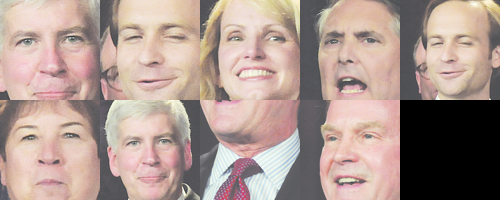

Results found in file a-3.png


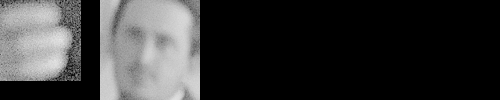

In [9]:
search( 'Christopher' , dict_images )

In [10]:
myzip.close()

In [11]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

from zipfile import ZipFile
from IPython.display import display

#converting zipfile into a zipfile object
myzip = ZipFile('readonly/images.zip')

#creating a list of filenames
lst_imgs = myzip.namelist() 
info_lst = myzip.infolist()
    
#creating list of PIL images
images = []
for file in info_lst :
    myfile = myzip.open(file)
    images.append(Image.open(myfile))

#creating a list of PIL images in black and white
bnw_images = []
for image in images :
    bnw_images.append(image.convert('1'))

    


In [12]:
#extracting text from images
text = []
for bnw_image in bnw_images :
    txt = pytesseract.image_to_string(bnw_image)
    text.append(txt)

In [13]:
#attacing text with images
dict_images1 = {}    
for i in range(len(images)) :
    dict_images1[i] = [images[i] , text[i] , lst_imgs[i] ]

In [14]:
#opening images in opencv format and extracting faces
lst_lst_faces = []
for file in info_lst :
    myfile = myzip.open(file)
    pil_img = Image.open(myfile)
    cv_img = np.asarray(pil_img)
    cv_gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(cv_gray , 1.5)
    lst_faces = faces
    lst_lst_faces.append(lst_faces)
    

Results found in file a-0.png


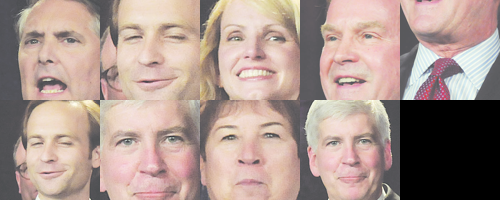

Results found in file a-1.png


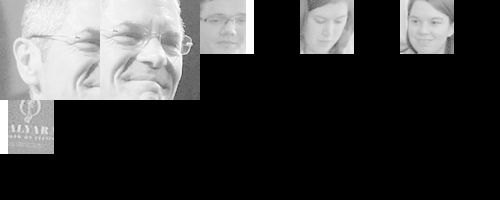

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


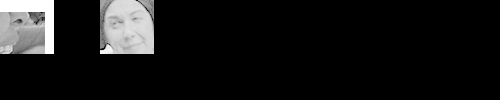

Results found in file a-2.png


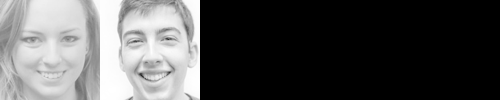

Results found in file a-3.png


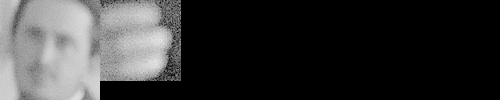

Results found in file a-8.png


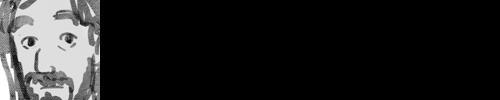

In [15]:
search( 'Mark' , dict_images1 )